In [1]:
%load_ext autoreload
%autoreload 2
import parmap
import pandas as pd
from tqdm import tqdm,tqdm_notebook
from utils.marking_similars import *
from utils.preprocess import *
import seaborn as sns
from utils.visualisation import *
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [11]:
import matplotlib
def convert(year,month,date):
    return int(datetime(year, month, date, 0, 0, 0).timestamp()*1000)

def convert_reverse(timestamp):
    dt_object = datetime.fromtimestamp(timestamp/1000)
    #print("dt_object =", dt_object)
    return dt_object


In [5]:
parent_path='Data/'

In [6]:
import json
with open(parent_path+'fear_speech_data.json', 'r') as fp:
    fear_speech_data=json.load(fp)

In [8]:
fear_speech_data['0']

{'message_text': '*प्रशासक समिति*✊🚩  ●●●●●●●●●●● ● ● ● 😎🚩 *आंतकवादी संगठनों का💣🔪 इस्लामिक नाम और उनका इस्लाम.....* *धर्म से जुड़ा हुआ अर्थ...* 🐖🐖🐖 *1.लश्करे तैयबा-फरिश्तो की सेना* *2.अल कायदा-अल्लाह का कायदा...* *3.जेश ए मोहम्द-मोहम्मद साहेब का दल...* *4.तहरिक ए तालिबान-पवित्र योद्धाओ का दल...* *5.हिजबुल मुजादिन-इस्लामी बलिदानियो का समूह...* *6.बोको हराम -पैगम्बर मुहम्मद की शिक्षा को फैलाने के लिए प्रतिबद्ध..* *सभी मुस्लमान अज्ञानि अल्लाह की बताई हुई रूहानी किताब क़ुरआन की बताई राह* *(पूरी दुनिया को इस्लाम बनाना)पर ही चल रहे है कोई ज्यादा बच👨\u200d👨\u200d👦* *पैदा करके तो कोई लव जिहाद👫 करके तो कोई काफ़िर(गेर मुसलमान)को मारकर..* *धरती पर आंतक🔫💣💣💣🔫फेला रहे है\ufeff।।* 😡😡😡😎😡😡😡  *जय सनातन धर्म की*🚩🚩🚩  🙏🚩🇮🇳🔱🏹🐚🕉',
 'annotation_list': ['Fear speech', 'Fear speech', 'Normal'],
 'propagation': [{'group_id': 9087,
   'user_id': 229869,
   'timestamp': 1538130086000},
  {'group_id': 7, 'user_id': 215, 'timestamp': 1550186113000}]}

In [29]:
repeat_tuples=[]
for key in fear_speech_data.keys():
    element = fear_speech_data[key]
    
    count_fearspeech=element['annotation_list'].count('Fear speech')
    count_normal=element['annotation_list'].count('Normal')
    
    if(count_fearspeech>count_normal):
        one_fear_speech=1
    else:
        one_fear_speech=0
    
    try:
        #### timestamps
        time_stamp_list = []
        for ele in element['propagation']:
            time_stamp_list.append(ele['timestamp'])
        time_stamp_list.sort()

        ##starting date
        timestamp=time_stamp_list[0]
        date=convert_reverse(timestamp)

        if(date.year==2019 and date.month>5):
            observed=0
        else:
            observed=1


        if(one_fear_speech==1):
            repeat_tuples.append([timestamp,observed,len(element['propagation']),'Fear speech'])
        else:
            repeat_tuples.append([timestamp,observed,len(element['propagation']),'Non Fear speech'])
    except:
        pass

In [30]:
df_repeat=pd.DataFrame(repeat_tuples,columns=['timestamp','observed','num_repeats','label'])


In [34]:
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(df_repeat[df_repeat['label']=='Fear speech'].num_repeats, df_repeat[df_repeat['label']=='Non Fear speech'].num_repeats)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1697844.000, p=0.00062
Different distribution (reject H0)


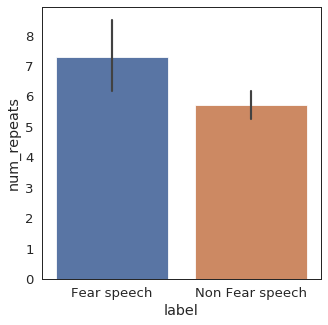

In [35]:
matplotlib.rcParams['figure.figsize'] = (5, 5)

#     'weight' : 'normal',
#     'size'   : 15}
# matplotlib.rc('font', **font)
#data_timeline.plot()
sns.set(context='paper',style='white',font_scale=1.5)

font = {
    'weight' : 'normal',
    'size'   : 11}
ax = sns.barplot(x="label", y="num_repeats", data=df_repeat)
#g=add_values(g,df_admin,15,order_list)
plt.savefig('../Fear_speech_results/number_of_repeats.pdf',bbox_inches='tight',dpi=400)

In [37]:
num_groups_affected=[]
for key in fear_speech_data.keys():
    element = fear_speech_data[key]
    
    count_fearspeech=element['annotation_list'].count('Fear speech')
    count_normal=element['annotation_list'].count('Normal')
    
    if(count_fearspeech>count_normal):
        one_fear_speech=1
    else:
        one_fear_speech=0
    
    group_list = []
    for ele in element['propagation']:
            group_list.append(ele['group_id'])

    
    
    
    if(one_fear_speech==1):
        num_groups_affected.append([len(set(group_list)),'Fear speech'])
    else:
        num_groups_affected.append([len(set(group_list)),'Non Fear speech'])


In [39]:
df_num_groups=pd.DataFrame(num_groups_affected,columns=['groups_affected','label'])

# generate two independent samples
# compare samples
stat, p = mannwhitneyu(df_num_groups[df_num_groups['label']=='Fear speech'].groups_affected, df_num_groups[df_num_groups['label']=='Non Fear speech'].groups_affected)
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1921507.000, p=0.0000265482
Different distribution (reject H0)


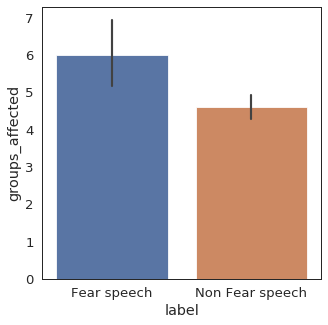

In [40]:
matplotlib.rcParams['figure.figsize'] = (5, 5)

#     'weight' : 'normal',
#     'size'   : 15}
# matplotlib.rc('font', **font)
#data_timeline.plot()
sns.set(context='paper',style='white',font_scale=1.5)

font = {
    'weight' : 'normal',
    'size'   : 11}
ax1 = sns.barplot(x="label", y="groups_affected", data=df_num_groups)#g=add_values(g,df_admin,15,order_list)
plt.savefig('../Fear_speech_results/groups_affected.pdf',bbox_inches='tight',dpi=400)


In [75]:
num_spreader=[]
for key in fear_speech_data.keys():    
    element = fear_speech_data[key]
    count_fearspeech=element['annotation_list'].count('Fear speech')
    count_normal=element['annotation_list'].count('Normal')
    
    if(count_fearspeech>count_normal):
        one_fear_speech=1
    else:
        one_fear_speech=0
    
    timestamp_list = []
    for ele in element['propagation']:
            timestamp_list.append(ele['timestamp'])
    
    
    try:
        days_active = (timestamp_list[-1] - timestamp_list[0])/(24*60*60*1000)
        
    except:
        days_active = 0
    
    if(one_fear_speech==1):
        num_spreader.append([days_active,'Fear speech'])
    else:
        num_spreader.append([days_active,'Non Fear speech'])


In [76]:
df_active=pd.DataFrame(num_spreader,columns=['days_active','label'])


# generate two independent samples
# compare samples
stat, p = mannwhitneyu(df_active[df_active['label']=='Fear speech'].days_active, df_active[df_active['label']=='Non Fear speech'].days_active)
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1896897.000, p=0.0000009504
Different distribution (reject H0)


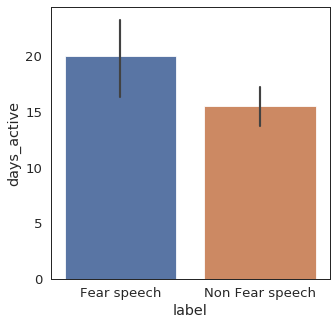

In [79]:
matplotlib.rcParams['figure.figsize'] = (5, 5)

#     'weight' : 'normal',
#     'size'   : 15}
# matplotlib.rc('font', **font)
#data_timeline.plot()
sns.set(context='paper',style='white',font_scale=1.5)

font = {
    'weight' : 'normal',
    'size'   : 11}
ax1 = sns.barplot(x="label", y="days_active", data=df_active)
plt.savefig('../Fear_speech_results/number_of_days_active.pdf',bbox_inches='tight',dpi=400)

In [80]:
num_spreader=[]
for key in fear_speech_data.keys():
    element = fear_speech_data[key]
    count_fearspeech=element['annotation_list'].count('Fear speech')
    count_normal=element['annotation_list'].count('Normal')
    
    if(count_fearspeech>count_normal):
        one_fear_speech=1
    else:
        one_fear_speech=0
    
    user_list = []
    for ele in element['propagation']:
            user_list.append(ele['user_id'])
  
    if(one_fear_speech==1):
        num_spreader.append([len(set(user_list)),'Fear speech'])
    else:
        num_spreader.append([len(set(user_list)),'Non Fear speech'])



    

In [81]:
df_num_users=pd.DataFrame(num_spreader,columns=['users_who_spread','label'])

# generate two independent samples
# compare samples
stat, p = mannwhitneyu(df_num_users[df_num_users['label']=='Fear speech'].users_who_spread, df_num_users[df_num_users['label']=='Non Fear speech'].users_who_spread)
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
    

Statistics=1874754.500, p=0.0000000412
Different distribution (reject H0)


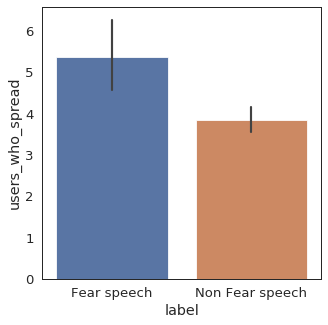

In [82]:
matplotlib.rcParams['figure.figsize'] = (5, 5)

#     'weight' : 'normal',
#     'size'   : 15}
# matplotlib.rc('font', **font)
#data_timeline.plot()
sns.set(context='paper',style='white',font_scale=1.5)

font = {
    'weight' : 'normal',
    'size'   : 11}
ax1 = sns.barplot(x="label", y="users_who_spread", data=df_num_users)
plt.savefig('../Fear_speech_results/users_who_spread.pdf',bbox_inches='tight',dpi=400)





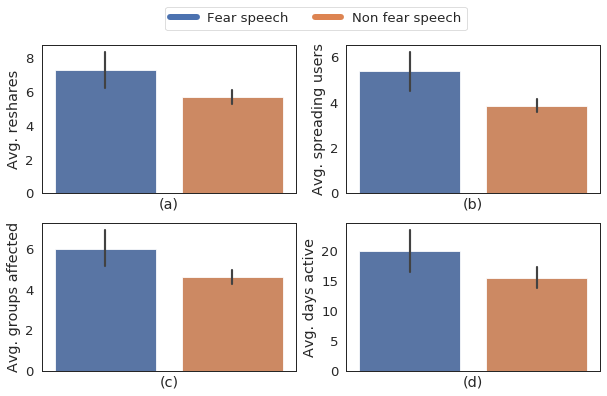

In [83]:
from matplotlib.lines import Line2D
from  matplotlib.ticker import FuncFormatter
matplotlib.rcParams['figure.figsize'] = (10, 6)

#     'weight' : 'normal',
#     'size'   : 15}
# matplotlib.rc('font', **font)
#data_timeline.plot()
sns.set(context='paper',style='white',font_scale=1.5)

font = {
    'weight' : 'normal',
    'size'   : 11}

ax1=plt.subplot(2, 2, 1)
ax = sns.barplot(x="label", y="num_repeats",ax=ax1,data=df_repeat)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Avg. reshares")
plt.xlabel("(a)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


ax2=plt.subplot(2, 2, 2)
ax = sns.barplot(x="label", y="users_who_spread",ax=ax2, data=df_num_users)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Avg. spreading users")

plt.xlabel("(b)")

ax3=plt.subplot(2, 2, 3)
ax = sns.barplot(x="label", y="groups_affected",ax=ax3, data=df_num_groups)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Avg. groups affected")

plt.xlabel("(c)")

ax4=plt.subplot(2, 2, 4)
ax = sns.barplot(x="label", y="days_active",ax=ax4, data=df_active)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Avg. days active")

plt.xlabel("(d)")

cmap=matplotlib.cm.get_cmap(name='tab20c')

custom_lines = [Line2D([0], [0], color=sns.color_palette()[0], lw=6),
                Line2D([0], [0], color=sns.color_palette()[1], lw=6)]


plt.legend(custom_lines, ['Fear speech', 'Non fear speech'],bbox_to_anchor=(0.5, 2.5), ncol=2)
#plt.legend(labels=['fear speech','non fear speech'], loc='center')
plt.savefig('../Fear_speech_results/total.pdf',bbox_inches='tight',dpi=400)

In [84]:
print('groups',np.mean(df_num_groups[df_num_groups['label']=='Non Fear speech']['groups_affected']))
print('days active',np.mean(df_active[df_active['label']=='Non Fear speech']['days_active']))
print('re shares',np.mean(df_repeat[df_repeat['label']=='Non Fear speech']['num_repeats']))
print('users who spread',np.mean(df_num_users[df_num_users['label']=='Non Fear speech']['users_who_spread']))

groups 4.599725274725275
days active 15.459084745115995
re shares 5.6899940440738535
users who spread 3.8315934065934067


In [85]:
print('groups',np.mean(df_num_groups[df_num_groups['label']=='Fear speech']['groups_affected']))
print('days active',np.mean(df_active[df_active['label']=='Fear speech']['days_active']))
print('re shares',np.mean(df_repeat[df_repeat['label']=='Fear speech']['num_repeats']))
print('users who spread',np.mean(df_num_users[df_num_users['label']=='Fear speech']['users_who_spread']))

groups 5.996497373029772
days active 19.925839434552763
re shares 7.277365491651206
users who spread 5.361646234676007
